In [27]:
import pandas as pd
import os

from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "dark", 
        color_codes = True,
        font_scale = 1.5)

In [28]:
def read_image_data(data_path, subset=False):

    folders = sorted(os.listdir(data_path))
    images, labels = [], []
    label_dict = {}

    # if ".DS_Store" in folders:
    #     folders.remove(".DS_Store")
        
    for label_no in range(len(folders)):
        folder = folders[label_no]
        label_dict[label_no] = folder
        # oslistdir = sorted(os.listdir(f"{data_path}/{folder}")) 
        oslistdir = sorted(os.listdir(os.path.join(os.getcwd(),data_path,folder))) 
        oslistdir = oslistdir[:10] if subset else oslistdir
        
        for image_name in oslistdir:
            # if image_name == ".DS_Store":
            #     continue

            image_path = f"{data_path}/{folders[label_no]}/{image_name}"
            image = io.imread(image_path)

            # # If image is grayscale, <-- ignored it seems even tho it is greyscale, may need to apply proactively
            # if len(image.shape) == 2:
            #     image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
                
            images.append(image)
            labels.append(label_no)
        
        print(f"\t [{((label_no + 1)/len(folders)) * 100:.1f} %] Fetching label '{folder}'           ", end='\r')
            
    print()
    df = pd.DataFrame()
    df['Image_Id'] = [i for i in range(len(images))]
    df['Image'] = images
    df['Label'] = labels
    return df, label_dict

# loading the folder image data and convert into nd array
training_data, label_dict_Train = read_image_data("Training")
print(label_dict_Train)

testing_data, label_dict_Test = read_image_data("Testing")
print(label_dict_Test)


	 [100.0 %] Fetching label 'pituitary_tumor'           
{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}
	 [100.0 %] Fetching label 'pituitary_tumor'           
{0: 'glioma_tumor', 1: 'meningioma_tumor', 2: 'no_tumor', 3: 'pituitary_tumor'}


In [29]:
# 1. Training Dataset
from skimage.color import rgb2gray

training_data["Dim"] = training_data["Image"].apply(np.shape)
training_data['width'], training_data['height'], _ = zip(*training_data.Dim) # * <- unpacks the array's elements
training_data['greyscale_image'] = training_data["Image"].apply(rgb2gray)
training_data

# based on the below image, greyscaling is needed for dimension reduction
# Note: need to greyscale numerically


,Image_Id,Image,Label,Dim,width,height,greyscale_image
0,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(512, 512, 3)",512,512,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...
2865,2865,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2866,2866,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2867,2867,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2868,2868,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3,"(512, 512, 3)",512,512,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [30]:
# 2. Testing Dataset
from skimage.color import rgb2gray

testing_data["Dim"] = testing_data["Image"].apply(np.shape)
testing_data['width'], testing_data['height'], _ = zip(*testing_data.Dim) # * <- unpacks the array's elements
testing_data['greyscale_image'] = testing_data["Image"].apply(rgb2gray)
testing_data

# Might need to combine both dataset into one dataframe

,Image_Id,Image,Label,Dim,width,height,greyscale_image
0,0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(619, 495, 3)",619,495,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(406, 386, 3)",406,386,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,2,"[[[7, 7, 7], [7, 7, 7], [7, 7, 7], [7, 7, 7], ...",0,"(419, 369, 3)",419,369,"[[0.027450980392156862, 0.027450980392156862, ..."
3,3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(581, 524, 3)",581,524,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0,"(581, 524, 3)",581,524,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...
389,389,"[[[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3], ...",3,"(436, 383, 3)",436,383,"[[0.011764705882352941, 0.011764705882352941, ..."
390,390,"[[[1, 1, 1], [2, 2, 2], [2, 2, 2], [2, 2, 2], ...",3,"(512, 512, 3)",512,512,"[[0.00392156862745098, 0.00784313725490196, 0...."
391,391,"[[[1, 1, 1], [2, 2, 2], [2, 2, 2], [2, 2, 2], ...",3,"(512, 512, 3)",512,512,"[[0.00392156862745098, 0.00784313725490196, 0...."
392,392,"[[[21, 21, 21], [21, 21, 21], [21, 21, 21], [2...",3,"(548, 538, 3)",548,538,"[[0.08235294117647059, 0.08235294117647059, 0...."


# EDA

## 1. Image Class Frequency

C:\Users\Asus\AppData\Local\Temp/ipykernel_7272/536939905.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[label_dict_Train[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])
C:\Users\Asus\AppData\Local\Temp/ipykernel_7272/536939905.py:8: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=[label_dict_Train[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])
C:\Users\Asus\AppData\Local\Temp/ipykernel_7272/536939905.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=55)


[Text(0, 0, 'glioma_tumor'),
 Text(1, 0, 'meningioma_tumor'),
 Text(2, 0, 'no_tumor'),
 Text(3, 0, 'pituitary_tumor')]

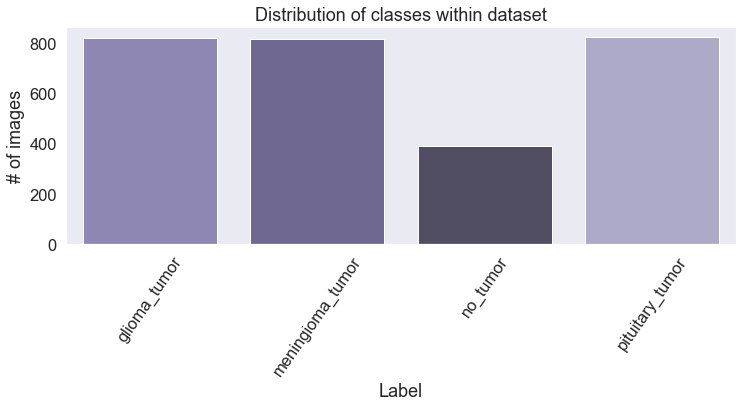

In [31]:
# Training's class frequency
plt.figure(figsize=(12,4))

labels = training_data.groupby("Label")["Image"].count()
pal = sns.color_palette("Purples_d", len(labels))
rank = labels.argsort().argsort()

ax = sns.barplot(x=[label_dict_Train[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])


plt.title("Distribution of classes within dataset")
plt.ylabel("# of images")
plt.xlabel("Label")
ax.set_xticklabels(ax.get_xticklabels(), rotation=55)

C:\Users\Asus\AppData\Local\Temp/ipykernel_7272/4058565728.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=[label_dict_Test[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])
C:\Users\Asus\AppData\Local\Temp/ipykernel_7272/4058565728.py:8: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=[label_dict_Test[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])
C:\Users\Asus\AppData\Local\Temp/ipykernel_7272/4058565728.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=55)


[Text(0, 0, 'glioma_tumor'),
 Text(1, 0, 'meningioma_tumor'),
 Text(2, 0, 'no_tumor'),
 Text(3, 0, 'pituitary_tumor')]

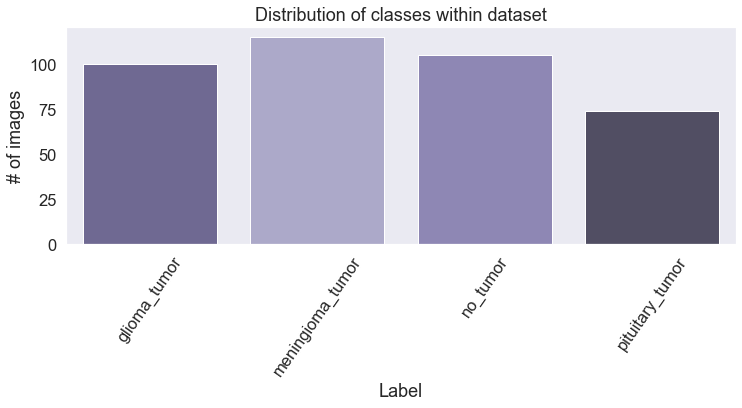

In [32]:
# Testing's class frequency
plt.figure(figsize=(12,4))

labels = testing_data.groupby("Label")["Image"].count()
pal = sns.color_palette("Purples_d", len(labels))
rank = labels.argsort().argsort()

ax = sns.barplot(x=[label_dict_Test[label] for label in labels.index], y=labels.values, palette=np.array(pal[::-1])[rank])


plt.title("Distribution of classes within dataset")
plt.ylabel("# of images")
plt.xlabel("Label")
ax.set_xticklabels(ax.get_xticklabels(), rotation=55)

## 2. Image Size Distribution

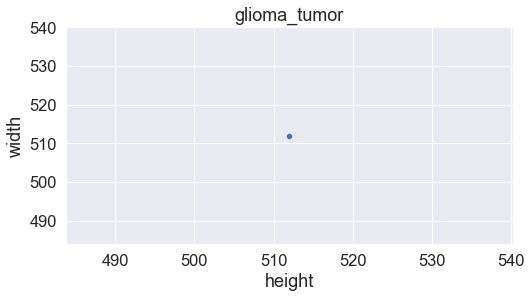

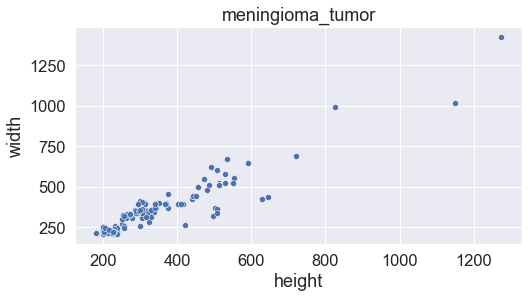

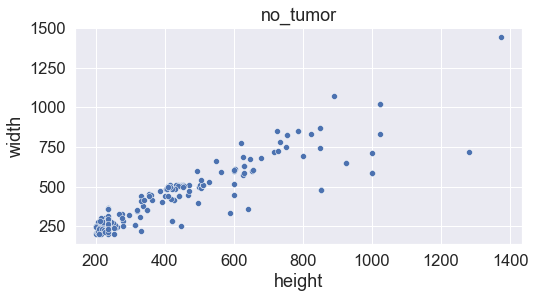

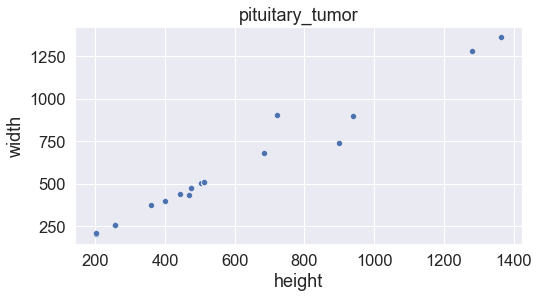

In [33]:
# Image Dimensions in terms of width and height distribution

# Training Dataset
sns.set_style('darkgrid')

for tumor_type in label_dict_Train:
    plt.figure(figsize=(8,4))
    ax = sns.scatterplot(y = 'width', x = 'height', data=training_data[training_data['Label']==tumor_type])
    ax.set(title=label_dict_Train[tumor_type])

# considering resizing to a standard image size too maybe

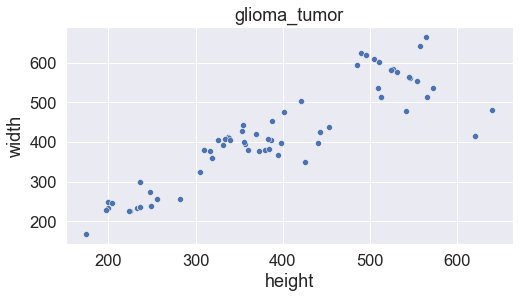

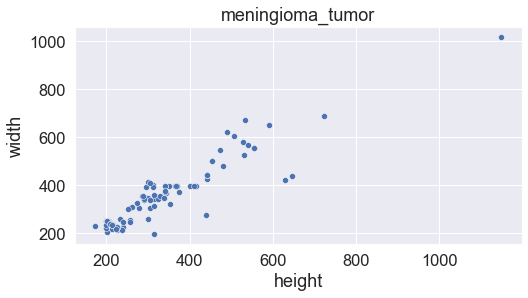

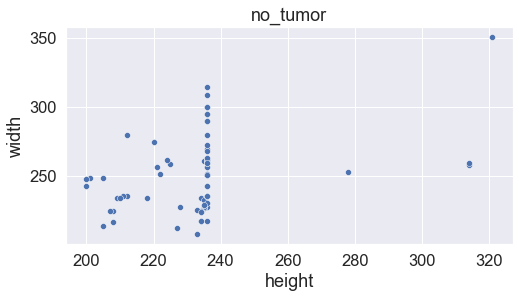

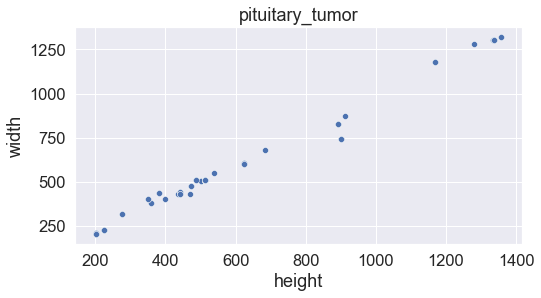

In [34]:
# Testing Dataset
sns.set_style('darkgrid')

for tumor_type in label_dict_Test:
    plt.figure(figsize=(8,4))
    ax = sns.scatterplot(y = 'width', x = 'height', data=testing_data[testing_data['Label']==tumor_type])
    ax.set(title=label_dict_Test[tumor_type])

In [35]:
train_gt_path = os.path.join(os.getcwd(),"Training","glioma_tumor")
train_mt_path = os.path.join(os.getcwd(),"Training","meningioma_tumor")
train_nt_path = os.path.join(os.getcwd(),"Training","no_tumor")
train_pt_path = os.path.join(os.getcwd(),"Training","pituitary_tumor")

test_gt_path = os.path.join(os.getcwd(),"Testing","glioma_tumor")
test_mt_path = os.path.join(os.getcwd(),"Testing","meningioma_tumor")
test_nt_path = os.path.join(os.getcwd(),"Testing","no_tumor")
test_pt_path = os.path.join(os.getcwd(),"Testing","pituitary_tumor")


In [36]:
print(len(os.listdir(train_gt_path))) # number of glioma_tumor in training set
print(len(os.listdir(train_mt_path))) # number of meningioma_tumor in training set
print(len(os.listdir(train_nt_path))) # number of no_tumor in training set
print(len(os.listdir(train_pt_path))) # number of pituitary_tumor in training set

print(len(os.listdir(test_gt_path))) # number of glioma_tumor in test set
print(len(os.listdir(test_mt_path))) # number of meningioma_tumor in test set
print(len(os.listdir(test_nt_path))) # number of no_tumor in test set
print(len(os.listdir(test_pt_path))) # number of pituitary_tumor in test set


826
822
395
827
100
115
105
74


In [37]:
image_folder_paths = [train_gt_path,train_mt_path,train_nt_path,train_pt_path,test_gt_path,test_mt_path,test_nt_path,test_pt_path]

# create a df
images_df = pd.DataFrame(columns=["image_path","tumor_class"])

for folder in image_folder_paths:
    tumor_class = os.path.basename(folder)
    folder_df = pd.DataFrame({"image_path":[os.path.join(folder,image_path) for image_path in os.listdir(folder)],"tumor_class":[tumor_class]*len(os.listdir(folder))})
    images_df = pd.concat([images_df,folder_df],ignore_index=True)



In [38]:
images_df

,image_path,tumor_class
0,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,glioma_tumor
1,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,glioma_tumor
2,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,glioma_tumor
3,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,glioma_tumor
4,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,glioma_tumor
...,...,...
3259,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,pituitary_tumor
3260,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,pituitary_tumor
3261,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,pituitary_tumor
3262,c:\Users\Asus\aug10\Jun9\Z_assignments\Year 3\...,pituitary_tumor


In [39]:
images_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3264 entries, 0 to 3263
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   3264 non-null   object
 1   tumor_class  3264 non-null   object
dtypes: object(2)
memory usage: 51.1+ KB
